In [36]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [38]:
x_train4d = x_train.reshape(x_train.shape[0],28,28,1).astype('float')
x_test4d = x_test.reshape(x_test.shape[0],28,28,1).astype('float')

In [39]:
x_train4d.max()

255.0

In [40]:
x_train4d_norm = x_train4d/ 255
x_test4d_norm = x_test4d/ 255

In [41]:
y_train_oh = np_utils.to_categorical(y_train)
y_test_oh = np_utils.to_categorical(y_test)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(filters = 16, kernel_size = (5, 5), padding = 'same', input_shape = (28,28,1), activation = 'relu'))

In [45]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [46]:
model.add(Conv2D(filters = 36, kernel_size = (5, 5), padding = 'same', activation = 'relu'))

In [47]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [48]:
model.add(Dropout(0.25))

In [49]:
model.add(Flatten())

In [50]:
model.add(Dense(128, activation = 'relu'))

In [51]:
model.add(Dropout(0.5))

In [52]:
model.add(Dense(10, activation = 'softmax'))

In [53]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

model.complie()

In [54]:
model.compile(loss ='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [55]:
train_history = model.fit(x_train4d_norm, y_train_oh, validation_split = 0.2, epochs = 10, batch_size = 300, verbose = 2)

Epoch 1/10
160/160 - 79s - loss: 0.4902 - accuracy: 0.8499 - val_loss: 0.0985 - val_accuracy: 0.9703
Epoch 2/10
160/160 - 80s - loss: 0.1388 - accuracy: 0.9589 - val_loss: 0.0711 - val_accuracy: 0.9783
Epoch 3/10
160/160 - 98s - loss: 0.0987 - accuracy: 0.9700 - val_loss: 0.0524 - val_accuracy: 0.9841
Epoch 4/10
160/160 - 111s - loss: 0.0800 - accuracy: 0.9755 - val_loss: 0.0462 - val_accuracy: 0.9868
Epoch 5/10
160/160 - 104s - loss: 0.0658 - accuracy: 0.9802 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 6/10
160/160 - 97s - loss: 0.0584 - accuracy: 0.9815 - val_loss: 0.0392 - val_accuracy: 0.9886
Epoch 7/10
160/160 - 76s - loss: 0.0525 - accuracy: 0.9846 - val_loss: 0.0409 - val_accuracy: 0.9876
Epoch 8/10
160/160 - 85s - loss: 0.0472 - accuracy: 0.9861 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 9/10
160/160 - 97s - loss: 0.0439 - accuracy: 0.9871 - val_loss: 0.0315 - val_accuracy: 0.9904
Epoch 10/10
160/160 - 90s - loss: 0.0395 - accuracy: 0.9879 - val_loss: 0.0370 - val_accu

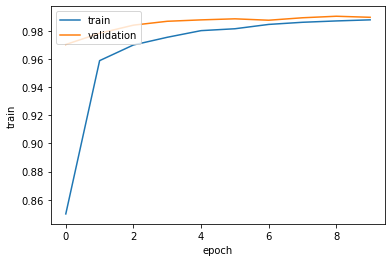

In [56]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.xlabel('epoch')
    plt.ylabel('train')
    plt.legend(['train','validation'], loc='upper left')
    plt.show()
    
show_train_history(train_history, 'accuracy', 'val_accuracy')

In [57]:
scores = model.evaluate(x_test4d_norm, y_test_oh)
print("loss=" + str(scores[0]))
print("accuracy=" + str(scores[1]))

313/313 [==============================] - 6s 19ms/step - loss: 0.0258 - accuracy: 0.9910
loss=0.025795288383960724
accuracy=0.9909999966621399


In [59]:
prediction = model.predict_classes(x_test4d_norm)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [60]:
import matplotlib.pyplot as plt
def plot_image_label_prediction(image,label,prediction,index,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num = 25
    for i in range(0, num):
        plots = plt.subplot(5, 5, 1+i)
        plots.imshow(image[index], cmap = "binary")
        title = "label=" + str(label[index])
        if len(prediction) > 0:
            title = title + ",predict=" + str(prediction[index])
        plots.set_title(title, fontsize = 10)
        index +=1
    plt.show()

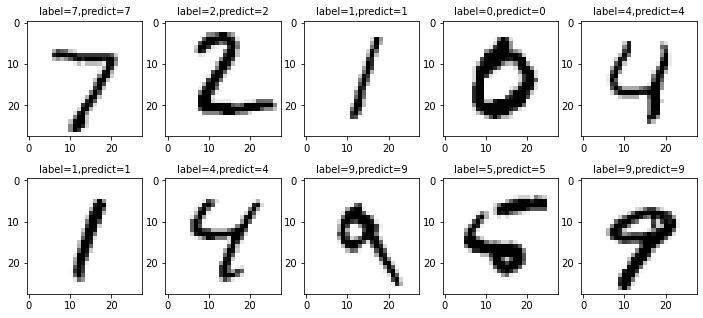

In [61]:
plot_image_label_prediction(x_test, y_test, prediction, 0, 10)

In [62]:
import pandas as pd
pd.crosstab(y_test, prediction, rownames = ['label'], colnames = ['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,1,0,0,0,0,4,1,0,0
1,0,1131,1,0,0,1,1,1,0,0
2,1,0,1028,0,0,0,0,1,2,0
3,1,0,1,996,0,6,0,2,4,0
4,0,0,0,0,979,0,1,0,0,2
5,1,0,0,3,0,884,3,0,0,1
6,2,2,0,0,1,1,952,0,0,0
7,0,4,4,0,0,0,0,1016,1,3
8,2,0,1,0,0,2,1,2,963,3
